In [90]:
import pandas as pd
df = pd.read_csv('file:///Users/chong97/Desktop/Machine_Learning_1/third_week/HY_Universe_corporate bond.csv')

In [91]:
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [92]:
import numpy as np
rate = np.unique(df['Bloomberg Composite Rating']).tolist()
rate.remove('NR')
rate.remove('Nan')
print(rate)

['A', 'A+', 'A-', 'AA', 'AA+', 'AA-', 'AAA', 'B', 'B+', 'B-', 'BB', 'BB+', 'BB-', 'BBB', 'BBB+', 'BBB-', 'C', 'C+', 'CC', 'CC+', 'CC-', 'CCC', 'CCC+', 'CCC-', 'DD+', 'DDD']


In [93]:
rate_Adjust=['AAA','AA+','AA','A+','A','A-','BBB+','BBB','BBB-','BB+','BB','BB-','B+','B','B-',
             'CCC+','CCC','CCC-','CC+','CC','CC-','C+','C','DDD','DD+']
Rate_array=np.array(rate_Adjust)

In [94]:
Number = []
for i in range(0,Rate_array.shape[0]):
    Number.append(df[df['Bloomberg Composite Rating']==Rate_array[i]].shape[0])
#print(Number)

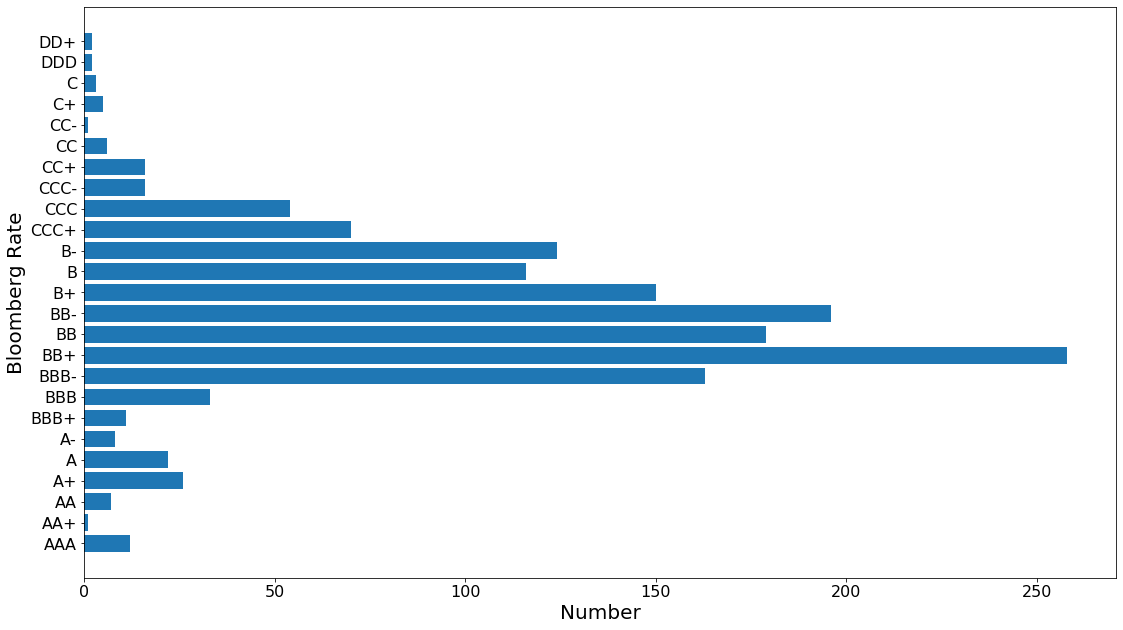

The high yield bonds are mainly rated B


In [95]:
import matplotlib.pyplot as plt
plt.tick_params(labelsize=16)
plt.barh(range(0,len(Number)),Number,tick_label=Rate_array)
fig = plt.gcf()
plt.ylabel('Bloomberg Rate',fontsize=20)
plt.xlabel('Number',fontsize=20)
fig.set_size_inches(18.5, 10.5)
plt.show()
print("The high yield bonds are mainly rated B")

In [96]:
import numpy as np
Industry = np.unique(df['Industry'])
print("Marketing research is one of my interests. So I will choose it as my theme today.")
print("All the industry:")
print(list(Industry))

Marketing research is one of my interests. So I will choose it as my theme today.
All the industry:
['Advertising', 'Aerospace/Defense', 'Agriculture', 'Airlines', 'Apparel', 'Auto Manufacturers', 'Auto Parts Equipment', 'Banks', 'Beverages', 'Biotechnology', 'Building Materials', 'Chemicals', 'Coal', 'Commercial Services', 'Computers', 'Cosmetics/Personal Care', 'Distribution/Wholesale', 'Diversified Finan Serv', 'Electric', 'Electrical Compo Equip', 'Electronics', 'Energy-Alternate Sources', 'Engineering Construction', 'Entertainment', 'Environmental Control', 'Food', 'Food Service', 'Forest Products Paper', 'Gas', 'Hand/Machine Tools', 'Healthcare-Products', 'Healthcare-Services', 'Holding Companies-Divers', 'Home Builders', 'Home Furnishings', 'Household Products/Wares', 'Housewares', 'Insurance', 'Internet', 'Investment Companies', 'Iron/Steel', 'Leisure Time', 'Lodging', 'Machinery-Constr Mining', 'Machinery-Diversified', 'Media', 'Metal Fabricate/Hardware', 'Mining', 'Miscellane

In [97]:
Number_industry = []
for i in range(0,Industry.shape[0]):
    Number_industry.append(df[df['Industry']==Industry[i]].shape[0])
Number_industry_array=np.array(Number_industry)
#print(Number_industry_array)
Main=np.where(Number_industry_array>30)
#print(Main)
Industry_main=Industry[Main]
#print(list(Industry_main))

In [98]:
Filtered_data_index=np.array([])
Industry_array=np.array(df['Industry'])

for i in range(0,Industry_main.shape[0]):
    Filtered_data_index=np.append(Filtered_data_index,np.where(Industry_array==Industry_main[i]))
#print(Filtered_data_index)

In [99]:
ND=pd.DataFrame(df.loc[Filtered_data_index,['Coupon','Industry']])
ND=ND.reset_index()
Coupon_array=np.array(ND['Coupon'])
Delete_index=np.where(Coupon_array[:]>30)
ND=ND.drop('index',axis=1)
ND.drop(np.array(Delete_index[0]),axis=0,inplace=True)
ND=ND.reset_index()
ND=ND.drop('index',axis=1)
#print(ND.head())

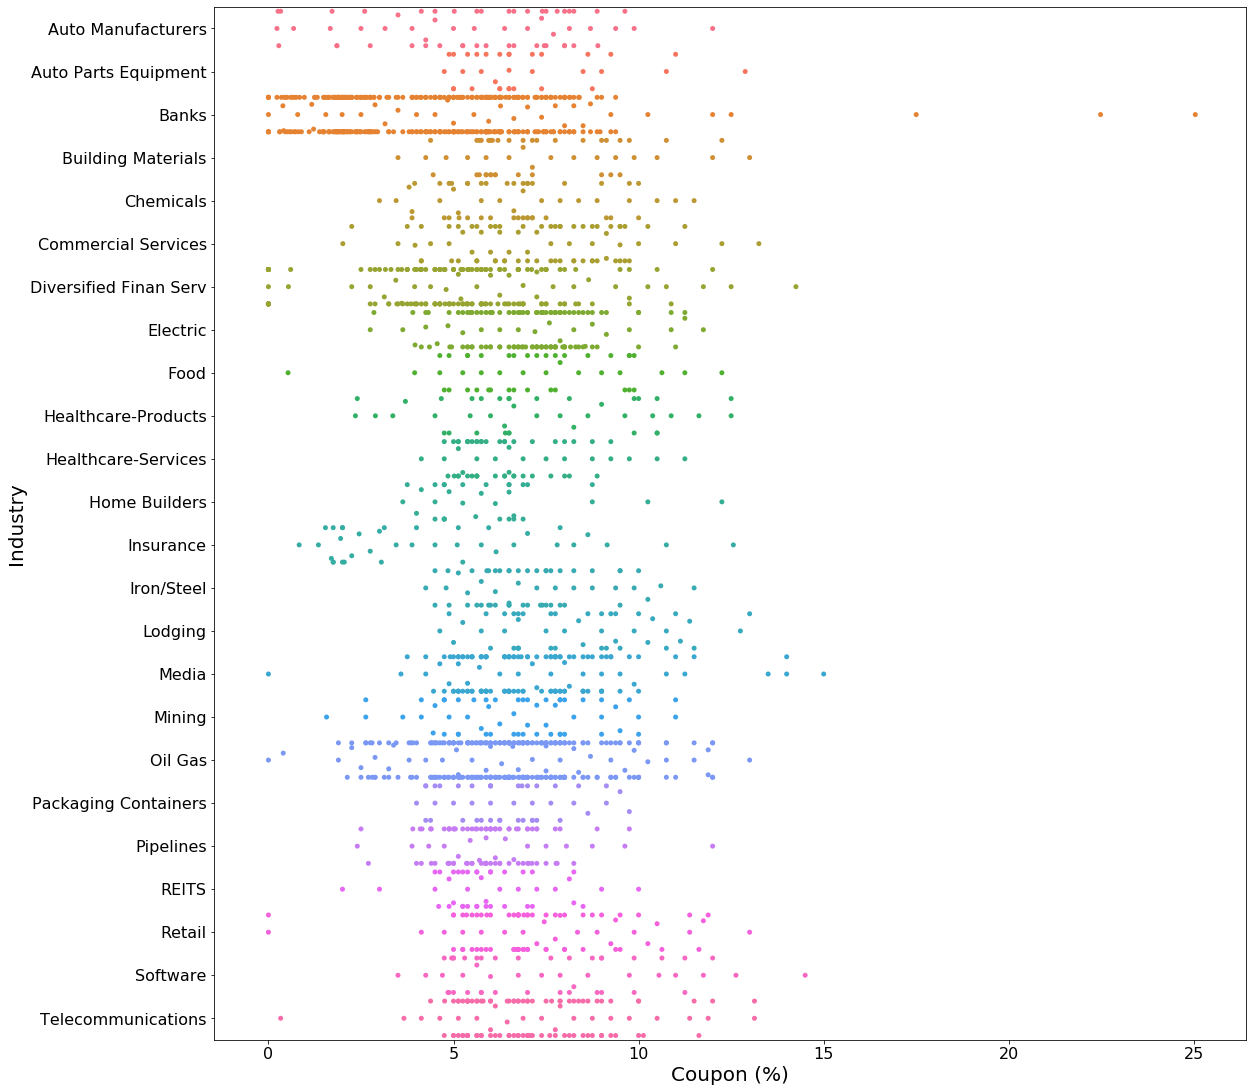

The coupon rate could reflect the financial cost in different industries.


In [100]:
import seaborn as sns
plt.tick_params(labelsize=16)
sns.swarmplot(y='Industry',x='Coupon',data=ND,palette="husl")
fig = plt.gcf()
fig.set_size_inches(18.5, 19)
plt.ylabel('Industry', fontsize=20)
plt.xlabel('Coupon (%)', fontsize=20)
plt.show()
print("The coupon rate could reflect the financial cost in different industries.")

In [101]:
Industry_liquidity=np.array(['Banks', 'Oil Gas','Media'])

In [102]:
Liquidity_data_index=np.array([])
Industry_array_l=np.array(df['Industry'])

for i in range(0,Industry_liquidity.shape[0]):
    Liquidity_data_index=np.append(Liquidity_data_index,np.where(Industry_array_l==Industry_liquidity[i]))
#print(Liquidity_data_index)

In [103]:
NDL=pd.DataFrame(df.loc[Liquidity_data_index,['LiquidityScore','Industry']])
NDL=NDL.reset_index()
NDL=NDL.drop('index',axis=1)
#print(NDL.head())

In [104]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

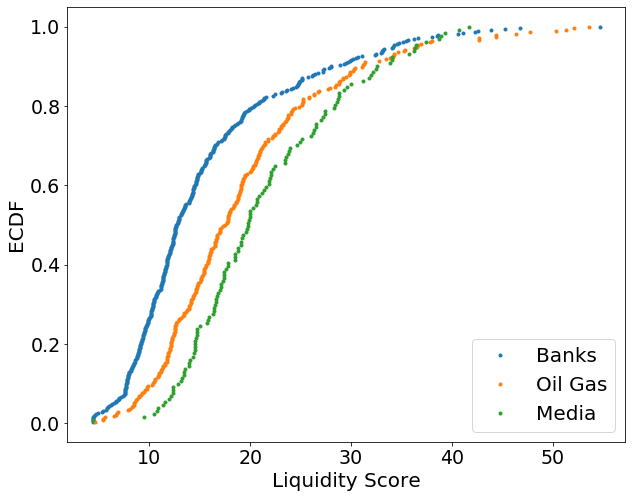

The liquidity scores vary in different sectors.


In [105]:
x_bank, y_bank = ecdf(np.array(NDL[NDL['Industry']=='Banks']['LiquidityScore']))
x_oil, y_oil = ecdf(np.array(NDL[NDL['Industry']=='Oil Gas']['LiquidityScore']))
x_media, y_media = ecdf(np.array(NDL[NDL['Industry']=='Media']['LiquidityScore']))
#x_retail, y_retail = ecdf(np.array(NDL[NDL['Industry']=='Retail']['LiquidityScore']))

plt.plot(x_bank, y_bank,marker='.',linestyle='none')
plt.plot(x_oil, y_oil,marker='.',linestyle='none')
plt.plot(x_media, y_media,marker='.',linestyle='none')
#plt.plot(x_retail, y_retail,marker='.',linestyle='none')

plt.legend(('Banks', 'Oil Gas', 'Media'), loc='lower right',fontsize=20)
plt.tick_params(labelsize=19)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.ylabel('ECDF', fontsize=20)
plt.xlabel('Liquidity Score', fontsize=20)
plt.show()
print("The liquidity scores vary in different sectors.")

In [106]:
Industry_issue=np.array(['Auto Manufacturers', 'Auto Parts Equipment', 'Banks', 'Building Materials', 'Chemicals', 'Commercial Services', 'Diversified Finan Serv', 'Electric', 'Food', 'Healthcare-Products', 'Healthcare-Services', 'Home Builders', 'Insurance', 'Iron/Steel', 'Lodging', 'Media', 'Mining', 'Oil Gas', 'Packaging Containers', 'Pipelines', 'REITS', 'Retail', 'Software', 'Telecommunications'])
#print(Industry_issue)

In [107]:
Issue_data_index=np.array([])
Industry_array_i=np.array(df['Industry'])

for i in range(0,Industry_issue.shape[0]):
    Issue_data_index=np.append(Issue_data_index,np.where(Industry_array_i==Industry_issue[i]))
#print(Liquidity_data_index)

In [108]:
NDI=pd.DataFrame(df.loc[Issue_data_index,['Issued Amount','Industry']])
NDI=NDI.reset_index()
NDI=NDI.drop('index',axis=1)
#print(NDI.head())
Industry = np.unique(NDI['Industry'])
#print(Industry)

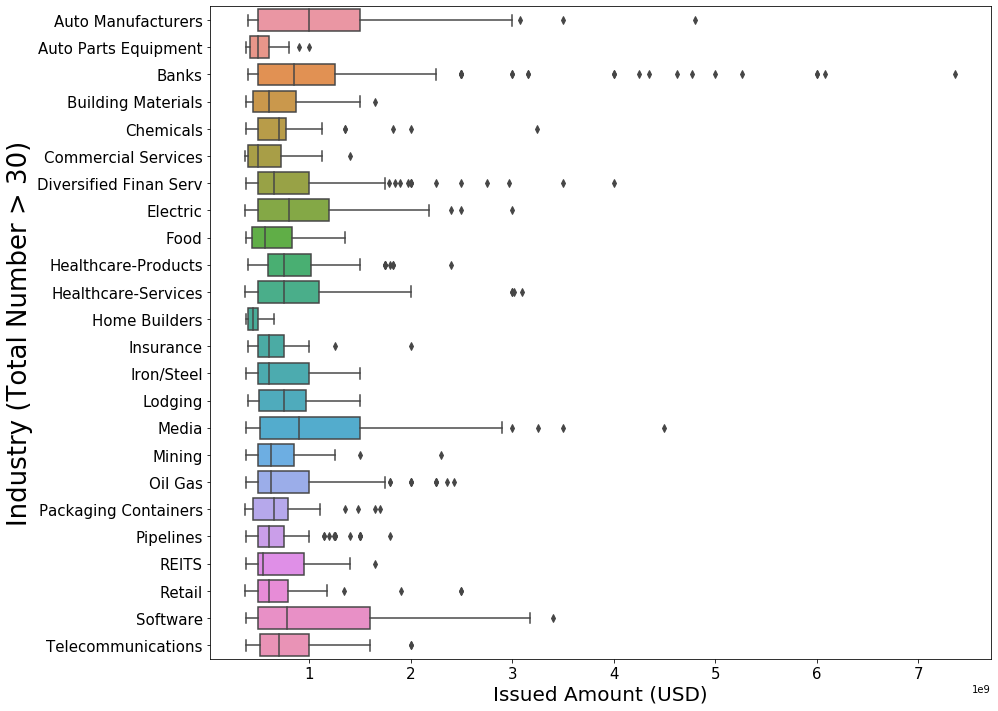

Some industries like auto manufacturers tend to issue more to finance its operation.


In [109]:
sns.boxplot(y='Industry',x='Issued Amount',data=NDI)
fig = plt.gcf()
fig.set_size_inches(14, 12)
plt.tick_params(labelsize=15)
plt.ylabel('Industry (Total Number > 30)', fontsize=26)
plt.xlabel('Issued Amount (USD)', fontsize=20)
plt.show()
print("Some industries like auto manufacturers tend to issue more to finance its operation.")

Test the correlation among liquidity score, issued amount and volume trades.


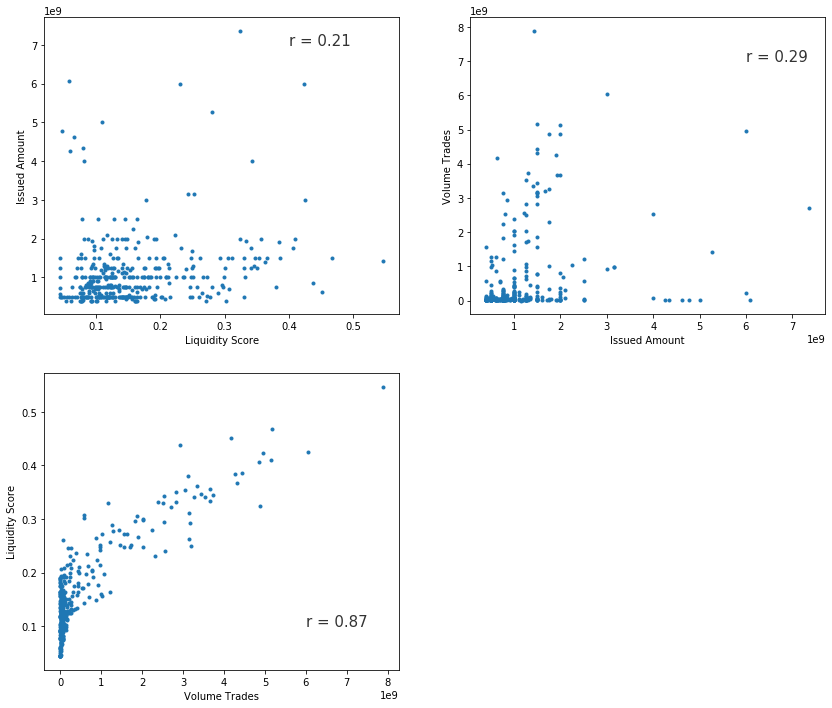

In [110]:
Liq_bank=df[df['Industry']=='Banks']['LIQ SCORE']
Iss_bank=df[df['Industry']=='Banks']['Issued Amount']
Vol_bank=df[df['Industry']=='Banks']['volume_trades']

fig = plt.gcf()
fig.set_size_inches(14, 12)
plt.tick_params(labelsize=15)

print("Test the correlation among liquidity score, issued amount and volume trades.")

ax1 = plt.subplot(2,2,1)
plt.sca(ax1)
plt.xlabel('Liquidity Score')
plt.ylabel('Issued Amount')
plt.text(0.4, 7e9, "r = 0.21", size = 15, alpha = 0.8)
plt.plot(Liq_bank,Iss_bank,marker='.',linestyle='none')

ax2 = plt.subplot(2,2,2)
plt.sca(ax2)
plt.xlabel('Issued Amount')
plt.ylabel('Volume Trades')
plt.text(6e9, 7e9, "r = 0.29", size = 15, alpha = 0.8)
plt.plot(Iss_bank,Vol_bank,marker='.',linestyle='none')

ax3 = plt.subplot(2,2,3)
plt.sca(ax3)
plt.xlabel('Volume Trades')
plt.ylabel('Liquidity Score')
plt.text(6e9, 0.1, "r = 0.87", size = 15, alpha = 0.8)
plt.plot(Vol_bank,Liq_bank,marker='.',linestyle='none')

In [111]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=np.zeros(3)

r[0]=pearson_r(Liq_bank,Iss_bank)
r[1]=pearson_r(Iss_bank,Vol_bank)
r[2]=pearson_r(Liq_bank,Vol_bank)
# Print the result
print(r)

[0.2144559  0.28638623 0.86605233]


Issued Amount of Bank-QQ plot:


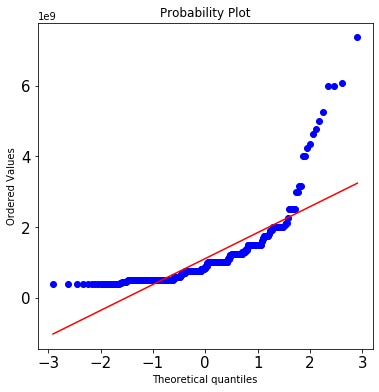

In [112]:
from scipy import stats

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.tick_params(labelsize=15)

print("Issued Amount of Bank-QQ plot:")
stats.probplot(Iss_bank,dist="norm",plot=plt)
plt.show()

Liquidity Score of Bank-QQ plot:


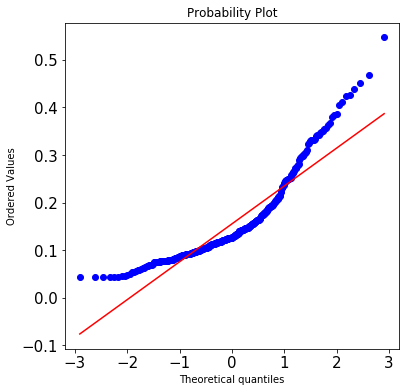

In [152]:
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.tick_params(labelsize=15)
print("Liquidity Score of Bank-QQ plot:")
stats.probplot(Liq_bank,dist="norm",plot=plt)
plt.show()

Here we multiply the Mean Liq and Std Liq 5e10 for better show in the same graph.


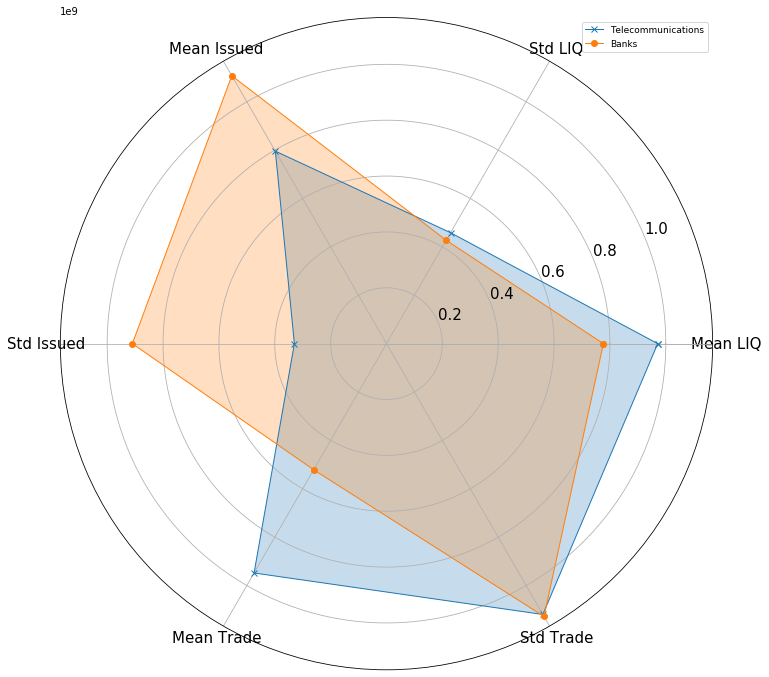

In [153]:
Liq_tel=df[df['Industry']=='Telecommunications']['LIQ SCORE']
Iss_tel=df[df['Industry']=='Telecommunications']['Issued Amount']
Vol_tel=df[df['Industry']=='Telecommunications']['volume_trades']
labels=np.array(['Mean LIQ','Std LIQ','Mean Issued','Std Issued','Mean Trade','Std Trade'])

tel=np.zeros(6)
tel[0]=np.mean(Liq_tel)*5e9
tel[1]=np.std(Liq_tel)*5e9
tel[2]=np.mean(Iss_tel)
tel[3]=np.std(Iss_tel)
tel[4]=np.mean(Vol_tel)
tel[5]=np.std(Vol_tel)

ban=np.zeros(6)
ban[0]=np.mean(Liq_bank)*5e9
ban[1]=np.std(Liq_bank)*5e9
ban[2]=np.mean(Iss_bank)
ban[3]=np.std(Iss_bank)
ban[4]=np.mean(Vol_bank)
ban[5]=np.std(Vol_bank)

angles=np.linspace(0,2*np.pi,6,endpoint=False)
tel=np.concatenate((tel,[tel[0]]))
ban=np.concatenate((ban,[ban[0]]))
angles=np.concatenate((angles,[angles[0]]))

print("Here we multiply the Mean Liq and Std Liq 5e10 for better show in the same graph.")

plt.polar(angles,tel,'x-',linewidth=1)
plt.fill(angles,tel,alpha=0.25)
plt.polar(angles,ban,'o-',linewidth=1)
plt.fill(angles,ban,alpha=0.25)
plt.legend(('Telecommunications','Banks'), loc='upper right',fontsize=9)
plt.thetagrids(angles*180/np.pi,labels)


fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.tick_params(labelsize=15)

In [149]:
print("I didn't use heat map and some other charts because I think it is not suitable for the datasat.")

I didn't use heat map and some other charts because I think it is not suitable for the datasat.


In [150]:
print("My name is Chong Zhao")
print("My NetID is: 657063491")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Chong Zhao
My NetID is: 657063491
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [ ]:
print("Here is the gitub link:")
print("https://github.com/Chong-code/IE598")